# Vinho Verde - Exercise

We just performed linear regression involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables (multiple linear regression).

In this exercise we will use a dataset with variants of the Portuguese *Vinho Verde* wine. We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will try to predict the quality of the wine.

Saturday I am receiving friends for dinner. I would like to offer my guests a glass of wine. I am currently shopping and I've got my eye on the next bottle of wine from Portugal. *(It is unbelievable what information can be found on a wine label these days)*

<table>
    <tr>
        <td>
            volatile acidity: 0.650<br />
            citric acid: 0.00<br />
            residual sugar: 1.2<br />
            chlorides: 0.089<br />
            free sulfur dioxide: 21.0<br />
            density: 1.3946<br />
            pH: 3.39<br />
            sulphates: 0.53<br />
            alcohol: 9.6<br />
        </td>
        <td>
            <img src="./resources/calamares.jpg"  style="height: 250px"/>
        </td>
    </tr>
</table>

Would this wine be a good choice? Can you help me?

## 1. Import and read the data

Import all the required libraries :

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Import the file *winequality.csv* using Pandas.

In [3]:
wine_df = pd.read_csv('./resources/winequality.csv')

## 2. Explore the data

Can you check the number of rows and columns in our dataset?

In [6]:
print(wine_df.shape)

(1599, 12)


What features of the wines are included in the data?

In [7]:
print(wine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Can you print the quality of the first 25 wines? What values are being used?

In [18]:
wine_df['quality'].head(25)

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
20    6
21    5
22    5
23    5
24    6
Name: quality, dtype: int64

Can you print all different values and count them?

In [4]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Can you check on a 2-D graph if there's any relationship between the fixed acidity and the pH of the wine?

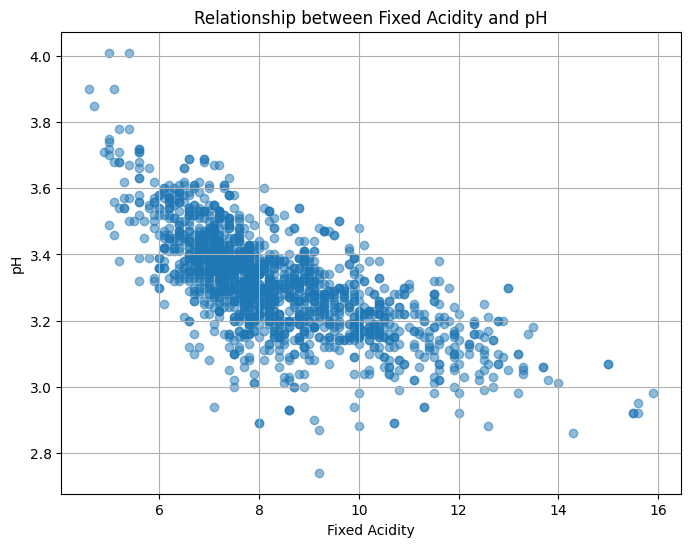

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(wine_df['fixed acidity'], wine_df['pH'], alpha=0.5)  
plt.title('Relationship between Fixed Acidity and pH')  
plt.xlabel('Fixed Acidity')  
plt.ylabel('pH')  
plt.grid(True)  
plt.show()

What can you see in the graph? The higher the fixed acidity, the lower the pH. You shoudn't be surprised, since pH is a scale used to specify how acidic a fluid is.

## 3. Histograms

Let’s check the quality of the wines. Create a histogram. What qualities occur the most? 5 and 6

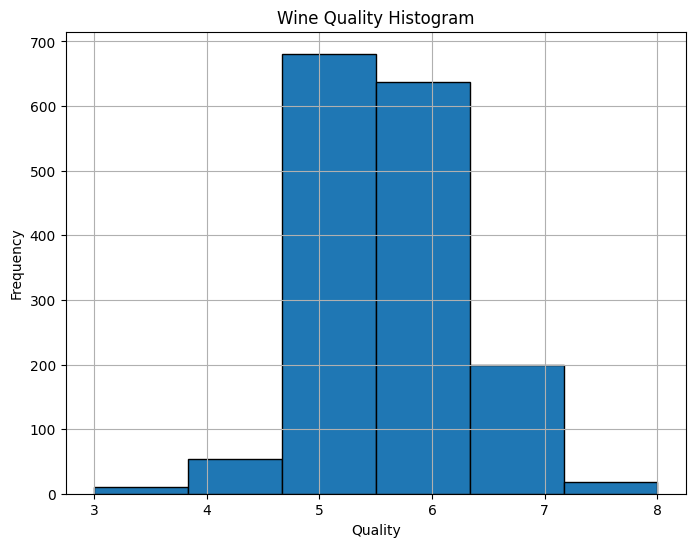

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(wine_df['quality'], bins=6, edgecolor='k')  
plt.title('Wine Quality Histogram')  
plt.xlabel('Quality')  
plt.ylabel('Frequency') 
plt.grid(True) 

plt.show()

## 4. Data splicing

Our next step is to divide the data into independent variables and dependent variables, whose values are to be predicted. To make the predictions we are only using the following independent variables

- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- density
- pH
- sulphates
- alcohol

to predict the quality. Create the two datasets and next, split 80% of the data to the training set and 20% to the test set.

In [19]:
from sklearn.model_selection import train_test_split

independent_vars = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                    'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = wine_df[independent_vars]  
y = wine_df['quality']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Print the independent and dependent training set.

In [20]:
print('independent:',X_train)

independent:       volatile acidity  citric acid  residual sugar  chlorides  \
642              0.540         0.45             2.3      0.071   
679              0.260         0.45             3.3      0.060   
473              0.350         0.55             2.1      0.062   
390              0.850         0.05             1.4      0.045   
1096             0.725         0.09             5.5      0.117   
...                ...          ...             ...        ...   
763              0.655         0.26             2.0      0.096   
835              0.665         0.10             1.5      0.066   
1216             0.570         0.31             2.0      0.079   
559              0.470         0.49             4.3      0.085   
684              0.980         0.32             2.3      0.078   

      free sulfur dioxide  density    pH  sulphates  alcohol  
642                  16.0  0.99910  3.39       0.62      9.4  
679                  20.0  0.99720  3.13       0.54      9.6  
473  

In [21]:
print('Dependent:',y_train)

Dependent: 642     5
679     5
473     5
390     8
1096    6
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1279, dtype: int64


## 5. Train the model

Now train the model.

In [23]:
model = LinearRegression()
model.fit(X_train, y_train) 

print('Intercept', model.intercept_) 
print('Coefficient', model.coef_) 

Intercept -0.9787068319213033
Coefficient [-1.25248127e+00 -2.16489304e-01  9.58460099e-03 -1.85150992e+00
 -3.10463860e-03  5.17992855e+00 -4.41513722e-01  8.50351464e-01
  3.14214768e-01]


In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [24]:
coefficients = model.coef_.reshape(9,-1)
variables = np.array([['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]).reshape(9,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

                               0
(volatile acidity,)    -1.252481
(citric acid,)         -0.216489
(residual sugar,)       0.009585
(chlorides,)           -1.851510
(free sulfur dioxide,) -0.003105
(density,)              5.179929
(pH,)                  -0.441514
(sulphates,)            0.850351
(alcohol,)              0.314215


This means that for a unit increase in *density*, there is an increase of 5.17 units in the quality of the wine. Similarly, a unit decrease in *chlorides* results in an increase of 1.85 units in the quality of the wine. 

## 6. Predictions

Now that we have trained our model, it’s time to make some predictions. Do the prediction on test data.

In [25]:
y_pred = model.predict(X_test)

Print the actual and predicted values for the first 25 wines from the test set.

In [28]:
result_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})

print(result_df)

      Actual  Predicted
1109       6   5.770024
1032       5   4.998167
1002       7   6.555406
487        6   5.309407
979        5   5.802326
1054       6   5.160463
542        5   5.346038
853        6   5.900482
1189       4   4.770874
412        5   5.037561
1099       5   5.254431
475        5   5.464691
799        6   5.713499
553        5   5.125334
1537       6   5.481531
1586       6   6.325166
805        7   6.791833
1095       5   5.764584
1547       5   5.949647
18         4   5.056578
1177       7   6.320042
549        6   5.129935
1341       6   5.629561
1235       4   6.334160
191        6   5.516534


C:\Users\kiera\AppData\Local\Temp\ipykernel_19660\1425366346.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  result_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})


Visualize the comparison result as a bar graph. Take only the first 10 results.

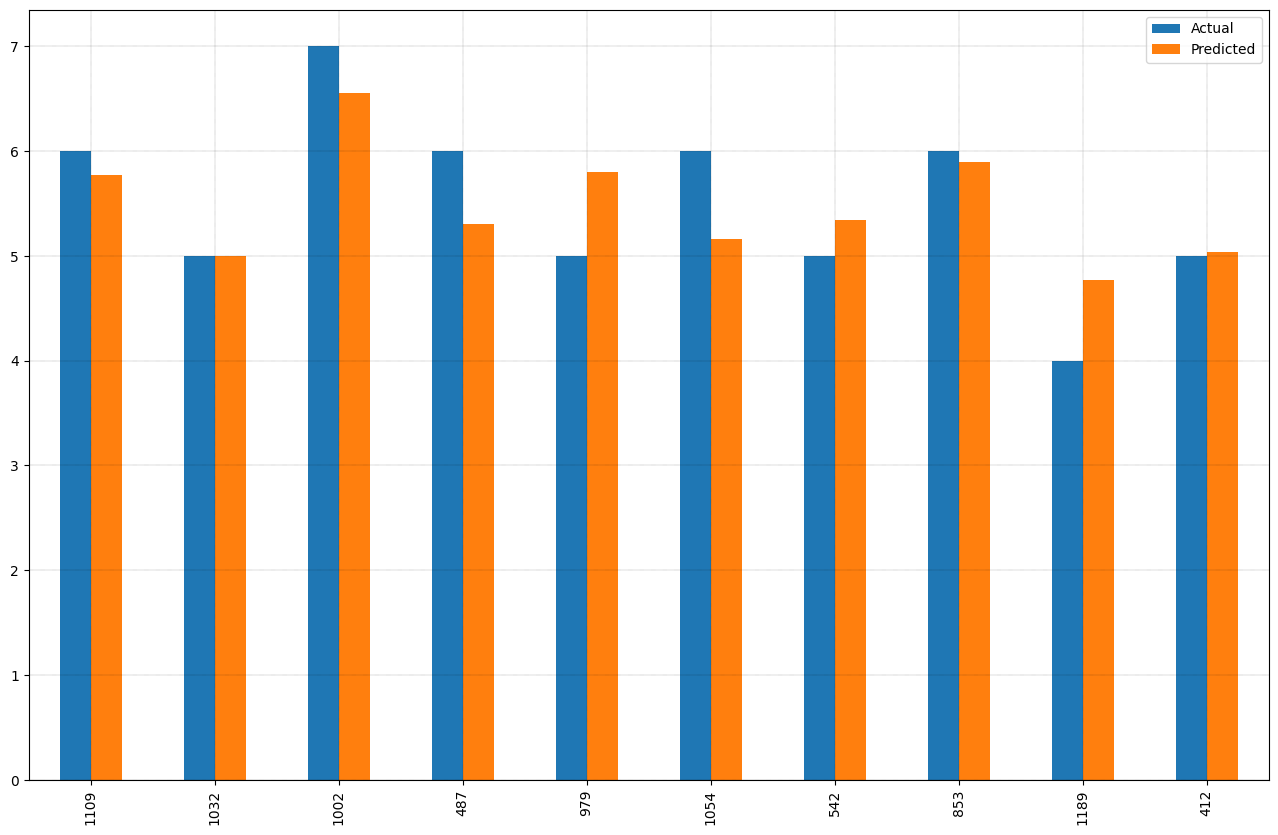

In [30]:
result10_df = result_df.head(10)
result10_df.plot(kind='bar', figsize=(16,10))
plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

The final step is to evaluate the performance of the algorithm. Since R² = 1 corresponds to the perfect fit, what can you conclude? the algorithm is not perfect

In [31]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print("R² Value:", r_squared)

R² Value: 0.31454303237463677


In [ ]:
# answer: value of R²? 0.31454303237463677
# ok? it is not verry good

Finaly can you predict the quality of my wine (details above)? Is it a good wine according to our model?

In [32]:
new_wine_features = {
    'volatile acidity': 0.650,
    'citric acid': 0.00,
    'residual sugar': 1.2,
    'chlorides': 0.089,
    'free sulfur dioxide': 21.0,
    'density': 1.3946,
    'pH': 3.39,
    'sulphates': 0.53,
    'alcohol': 9.6
}

# Convert the dictionary to a DataFrame
new_wine_df = pd.DataFrame([new_wine_features])

# Use the trained model to make a prediction
predicted_quality = model.predict(new_wine_df)

# Print the predicted wine quality
print("Predicted Wine Quality:", predicted_quality[0])

Predicted Wine Quality: 7.183044952074625


In [ ]:
# answer: quality of wine?
# according to the model the quality of this wine is 7.18